K-MEANS ON THE GIVEN DATASET

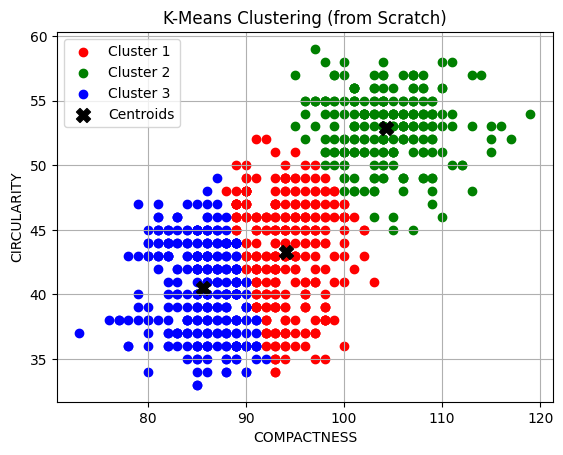


--- Evaluation Metrics ---
Silhouette Score: 0.4144
Davies-Bouldin Index: 0.8929
Calinski-Harabasz Index: 1379.4256
Adjusted Rand Index: Skipped (no ground truth labels found)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score
)

# 1. Load the dataset
df = pd.read_csv("/content/lab_vehicle.csv")

# 2. Select two features for clustering
X = df.iloc[:, :2].values  # Modify if you want to use specific columns

# 3. Euclidean distance function
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# 4. Initialize centroids
def initialize_centroids(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]

# 5. Assign clusters manually
def assign_clusters(X, centroids):
    labels = []
    for point in X:
        dists = [euclidean_distance(point, c) for c in centroids]
        labels.append(np.argmin(dists))
    return np.array(labels)

# 6. Update centroids
def update_centroids(X, labels, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean(axis=0))
        else:
            new_centroids.append(X[np.random.randint(0, len(X))])
    return np.array(new_centroids)

# 7. K-Means main loop
def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# 8. Run K-Means
k = 3
centroids, labels = kmeans(X, k)

# 9. Plot the clusters
colors = ['r', 'g', 'b', 'y', 'c']
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=100, label='Centroids')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('K-Means Clustering (from Scratch)')
plt.legend()
plt.grid(True)
plt.show()

# 10. Evaluation Metrics
print("\n--- Evaluation Metrics ---")

# a. Silhouette Score (higher is better)
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.4f}")

# b. Davies-Bouldin Index (lower is better)
db_index = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")

# c. Calinski-Harabasz Index (higher is better)
ch_index = calinski_harabasz_score(X, labels)
print(f"Calinski-Harabasz Index: {ch_index:.4f}")

# d. Adjusted Rand Index (only if true labels exist)
# Try to auto-detect a 'label' column, or skip if not present
possible_label_cols = ['label', 'Label', 'class', 'Class', 'target', 'Target']
true_labels = None
for col in possible_label_cols:
    if col in df.columns:
        true_labels = df[col].values
        break

if true_labels is not None:
    ari = adjusted_rand_score(true_labels, labels)
    print(f"Adjusted Rand Index (vs '{col}'): {ari:.4f}")
else:
    print("Adjusted Rand Index: Skipped (no ground truth labels found)")


K-MEANS ON ANOTHER DATASET

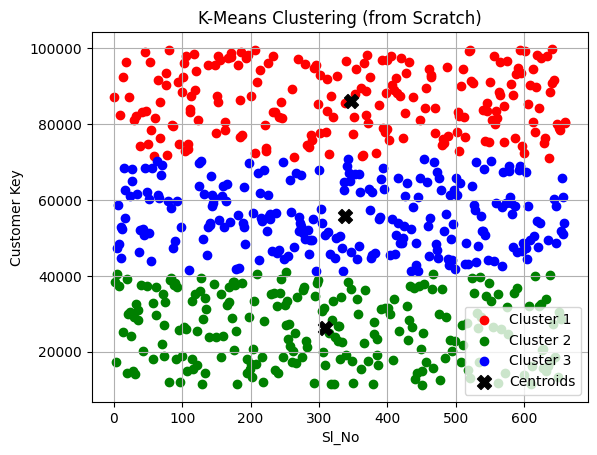


--- Evaluation Metrics ---
Silhouette Score: 0.5951
Davies-Bouldin Index: 0.4994
Calinski-Harabasz Index: 2612.2865
Adjusted Rand Index: Skipped (no ground truth labels found)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score
)

# 1. Load the dataset
df = pd.read_csv("/content/archive.zip")

# 2. Select two features for clustering
X = df.iloc[:, :2].values  # Modify if you want to use specific columns

# 3. Euclidean distance function
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# 4. Initialize centroids
def initialize_centroids(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]

# 5. Assign clusters manually
def assign_clusters(X, centroids):
    labels = []
    for point in X:
        dists = [euclidean_distance(point, c) for c in centroids]
        labels.append(np.argmin(dists))
    return np.array(labels)

# 6. Update centroids
def update_centroids(X, labels, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean(axis=0))
        else:
            new_centroids.append(X[np.random.randint(0, len(X))])
    return np.array(new_centroids)

# 7. K-Means main loop
def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# 8. Run K-Means
k = 3
centroids, labels = kmeans(X, k)

# 9. Plot the clusters
colors = ['r', 'g', 'b', 'y', 'c']
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=100, label='Centroids')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('K-Means Clustering (from Scratch)')
plt.legend()
plt.grid(True)
plt.show()

# 10. Evaluation Metrics
print("\n--- Evaluation Metrics ---")

# a. Silhouette Score (higher is better)
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.4f}")

# b. Davies-Bouldin Index (lower is better)
db_index = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")

# c. Calinski-Harabasz Index (higher is better)
ch_index = calinski_harabasz_score(X, labels)
print(f"Calinski-Harabasz Index: {ch_index:.4f}")

# d. Adjusted Rand Index (only if true labels exist)
# Try to auto-detect a 'label' column, or skip if not present
possible_label_cols = ['label', 'Label', 'class', 'Class', 'target', 'Target']
true_labels = None
for col in possible_label_cols:
    if col in df.columns:
        true_labels = df[col].values
        break

if true_labels is not None:
    ari = adjusted_rand_score(true_labels, labels)
    print(f"Adjusted Rand Index (vs '{col}'): {ari:.4f}")
else:
    print("Adjusted Rand Index: Skipped (no ground truth labels found)")
